K-Means clustering works by iteratively updating a pre-defined number of cluster centers. It does this by finding the distance between each datapoint and every cluster center. 

Datapoints are then assigned to the cluster center they are closest to and each cluster center is updated to be the mean of the new cluster. These steps are repeated for some number of steps or until the cluster centers converge
Lets have a look at the steps of K-means clustering
1. Define the number of clusters "k" you want to group your data into<br>
2. Randomly initialise k vectors with the same size as each datapoint, this is the initialisation of our cluster centers<br>
3. Calculate the distance between each datapoint and each cluster center (using MSE or equivalent)<br>
4. For every datapoint find the cluster center they are closest to<br>
5. Re-calculate the cluster centers by finding the mean of every new cluster<br>
6. Repeat steps 3-5 for n steps or until convergence

In [4]:
import matplotlib.pyplot as plt
import numpy as np  
import pandas as pd

<b>Using the module "load" that comes with this notebook, lets load our dataset</b><br>
The dataset we'll be using is the MNIST dataset, a dataset of small, low-res handwritten digits. There are 60000 training images and 10000 test images divided up into 10 classes (digits 0-9). Here we will be using the test set (as it's a smaller set)

In [33]:
data = pd.read_csv('train.csv')
data = np.array(data)
np.random.shuffle(data) 

In [34]:
data_dev = data[0:10000].T
data_dev.shape

(785, 10000)

In [35]:
Y_dev = data_dev[0,:]

In [36]:
Y_dev.shape

(10000,)

In [40]:
X_dev = data_dev[1:]
X_dev = X_dev.T

In [52]:
# Number of datapoints
num_img = 1000

# Number of cluster centers, 10 because the dataset contains 10 classes eg: digit 0 to 9
num_means = 10   

# We'll perform this many iterations of the algorithm
iterations = 100

# Each image is 28*28 pixels, which has been flattened to a vector 0f 784 values
data_size = 28*28

# The images are 8 bit greyscale images (values range from 0-255)
# We'll rescale the pixel values to be between 0-1 (We don't REALLY need to do this for k-means)
X_dev = (X_dev.astype(float) / 255)

### K Means Initialization
Here we'll initialise the cluster centers to random values by randomly sampling 10 points from the dataset

In [53]:
# Randomly generate K indices for k datapoints from the dataset (indices need to be int)
means = X_dev[np.random.randint(0, num_img, num_means)]
# Pluck out 10 random rows

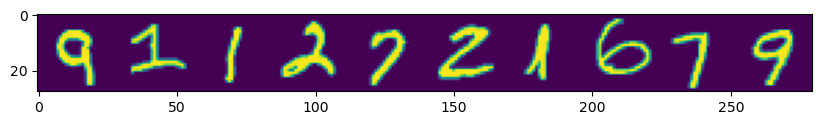

In [54]:
plt.figure(1, figsize=(10, 20))
_ = plt.imshow(means.reshape(num_means, 28, 28).transpose((1, 0, 2)).reshape(28, num_means*28))

In [55]:
# Initialize a vector that wil contain the the cluster index for each datapoint
cluster_index = np.zeros(num_img)

for i in range(iterations): 
    for j in range(num_img):
        # Init a list to store the distance from the datapoint to each cluster center
        dist_to_center = []
        # Looping through all cluster vectors
        # Calculate the distance from the datapoint to each cluster center and store it in the list
        for k in range(num_means):
            dist = np.mean((X_dev[j, :] - means[k, :]) ** 2)
            dist_to_center.append(dist)
        # Find the index of the cluster center with the smallest distance to the datapoint and store it
        cluster_index[j] = np.argmin(dist_to_center)

    # Updating the cluster center positions
    # For every cluster find the new mean (new cluster center)
    for o in range(num_means):
        # Initalize a counter of the number of points in the cluster
        count = 0
        # Initalize a sum of the datapoints in the cluster
        cluster_sum = 0
        # Find all the datapoints closest to cluster and sum them together 
        for p in range(num_img):
            if cluster_index[p] == o:
                count += 1
                cluster_sum+=X_dev[p,:]
        # Find the new mean of the cluster
        if count > 0:
            means[o, :] = cluster_sum / count

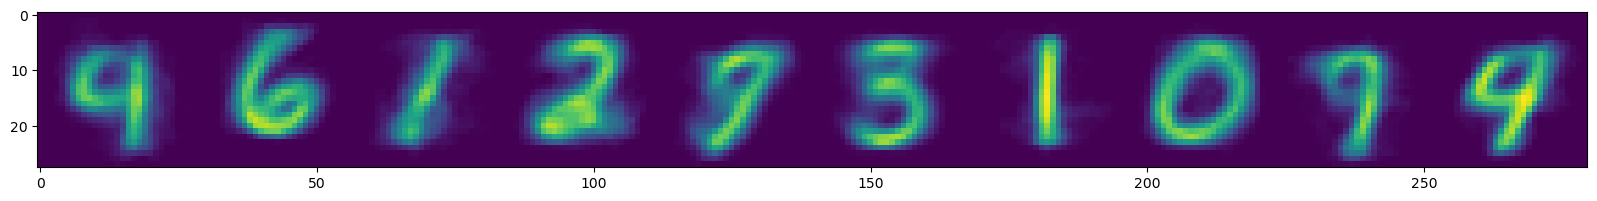

In [56]:
plt.figure(1, figsize=(20, 10))
img = means.reshape(num_means, 28, 28).transpose((1, 0, 2)).reshape(28, num_means*28)
_ = plt.imshow(img)

In [62]:
means.shape

(10, 784)

In [63]:
np.expand_dims(X_dev, 1).shape

(10000, 1, 784)

In [64]:
for i in range(iterations):
    # Add on a dimension in the right place and use broadcasting to find the differences
    # Broadcasts the left matrice 1000 times, to the right one
    diff_from_means = np.expand_dims(means, 0) - np.expand_dims(X_dev, 1)
    # Using mean square of differences here
    # Take the mean across idx 2 dimension
    dist_to_means = np.mean(diff_from_means ** 2, 2) # (10000, 10, 784) -> (10000, 10)
    indx_of_means = np.argmin(dist_to_means, 1) # (10000, 10)
    # Create a one hot coded vector per datapoint, indexing into the array of clusters
    a = np.eye(num_means)[indx_of_means].T # (10, 10000)
    # Multiply to get the sums of each cluster then divide by elements per cluster to get means
    means = np.matmul(a, X_dev) / np.expand_dims(np.sum(a,1),1) 

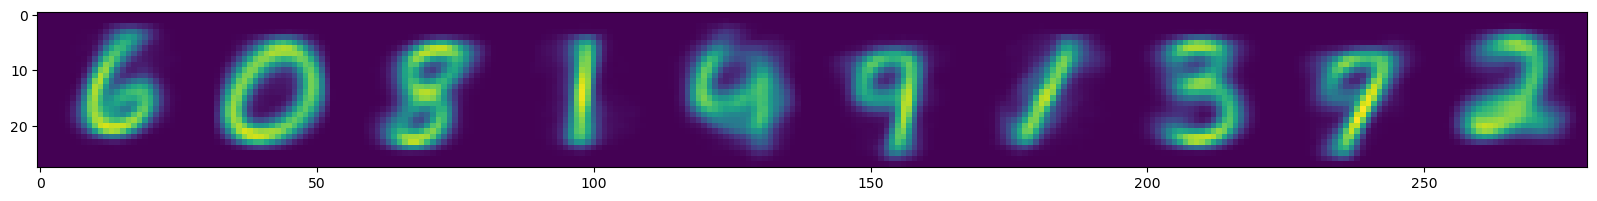

In [51]:
plt.figure(1, figsize=(20, 10))
img = means.reshape(num_means, 28, 28).transpose((1, 0, 2)).reshape(28, num_means*28)
_ = plt.imshow(img)